<a href="https://colab.research.google.com/github/SidorenkArtem/Health_Insurance_Dataset/blob/master/ExtraTreesRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (3).csv


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "insurance.csv" with length 55628 bytes


In [3]:
from keras.utils import to_categorical
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("insurance.csv")

In [0]:
data = data.fillna(data.mean())
data_new = data.copy()
le = LabelEncoder()
data_new['sex'] = le.fit_transform(data_new['sex'])
data_new['smoker'] = le.fit_transform(data_new['smoker'])
df_dummles = pd.get_dummies(data_new, columns=['region'])
data_new = np.array(df_dummles)

Преобразуем категориальные данные для упрощенной работы с ними. 

In [0]:
def visualization_result(y_test, y_pred):
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
  print(df)

  df1 = df.head(25)
  df1.plot(kind='bar',figsize=(16,10))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

In [0]:
def visualization_error(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Сначала я иcпользую входной массив x со всеми полями.
Произвожу разделение данных: train = 80%, test = 20%.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


          Actual     Predicted
0     1646.42970   1650.183065
1    11353.22760  11705.146658
2     8798.59300   8877.439537
3    10381.47870  10710.142007
4     2103.08000   2120.221839
..           ...           ...
263  40103.89000  40712.894075
264  42983.45850  47287.812306
265  44202.65360  44359.581365
266   2136.88225   2130.658050
267   5227.98875   7281.925286

[268 rows x 2 columns]


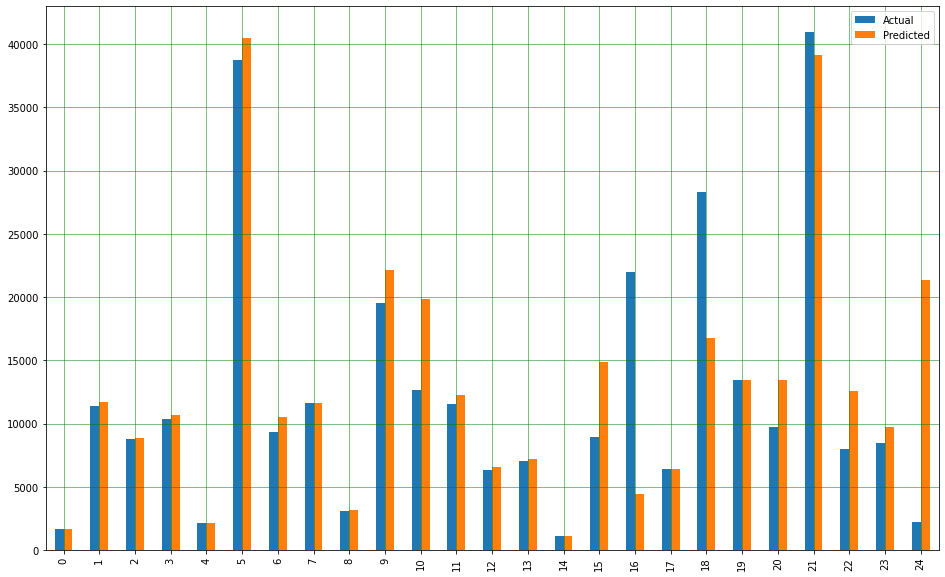

Mean Absolute Error: 2505.771883106717
Root Mean Squared Error: 5023.037057229011


In [8]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)
regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 1.** 

Попробую стандартизировать поля 'bmi', 'age', 'charges', чтобы уменьшить влияние выбросов.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1642.036006
1    11353.22760  11757.335121
2     8798.59300   8929.817588
3    10381.47870  10688.468580
4     2103.08000   2067.785231
..           ...           ...
263  40103.89000  40705.518078
264  42983.45850  49341.627839
265  44202.65360  44236.369996
266   2136.88225   2136.061559
267   5227.98875   6413.602364

[268 rows x 2 columns]


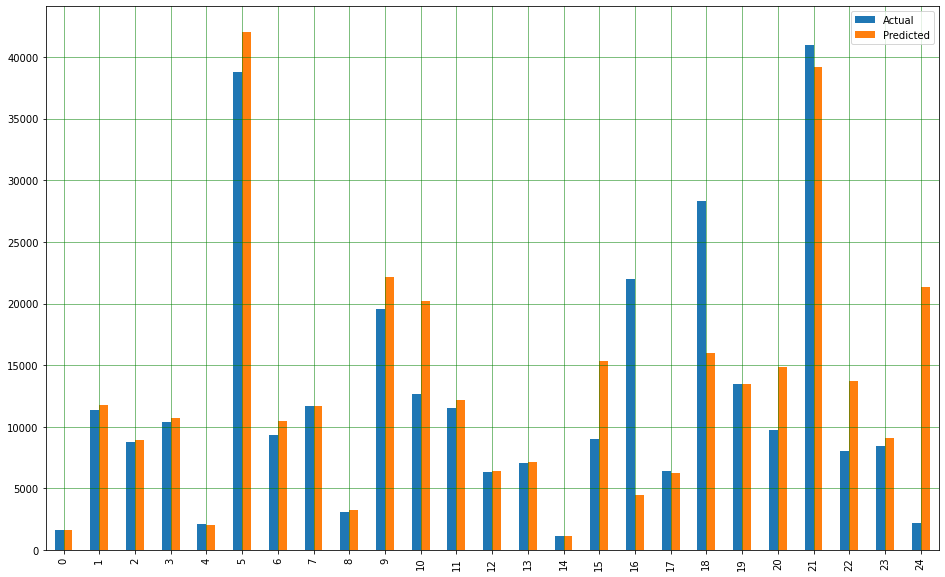

Mean Absolute Error: 2515.70879278526
Root Mean Squared Error: 5053.3104534959175


In [9]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 2**

Теперь попробую использовать в X те метки, которые оказались более важными.
В представленном ниже примере использую метки, выделенные классификатор ExtraTreesClassifier и Boruto. Это 'age', 'bmi', 'smoker', 'children'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1318.779786
1    11353.22760  11787.003514
2     8798.59300   9396.567819
3    10381.47870  10856.417731
4     2103.08000   2524.586258
..           ...           ...
263  40103.89000  40896.441493
264  42983.45850  47944.235543
265  44202.65360  45112.955656
266   2136.88225   1796.712713
267   5227.98875   4903.725754

[268 rows x 2 columns]


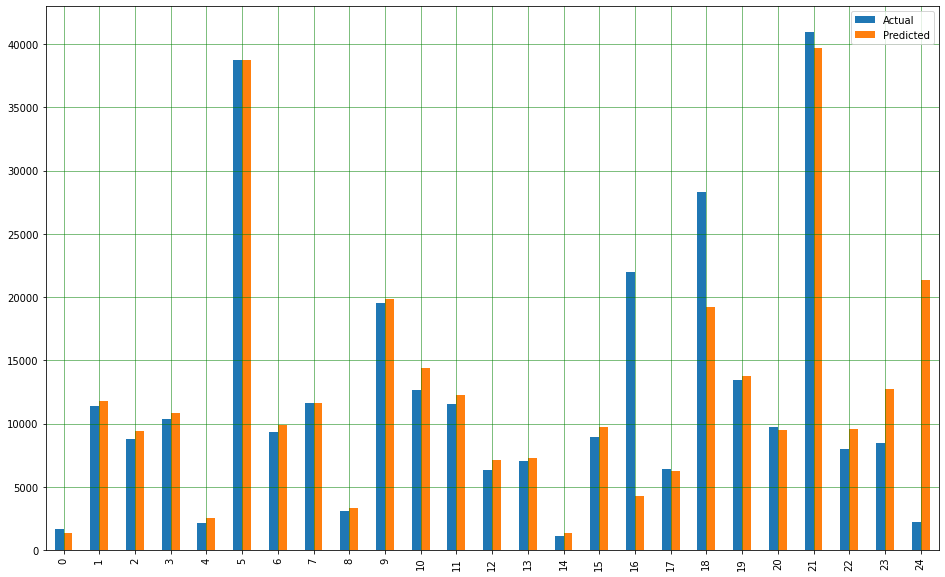

Mean Absolute Error: 2588.5104866276865
Root Mean Squared Error: 5183.538299772662


In [10]:
x = data_new[:,[0,2,3,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

Из корреляционной матрицы можно выделить 'age', 'bmi', 'smoker'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1346.579856
1    11353.22760  11822.054788
2     8798.59300  10488.030524
3    10381.47870   8338.708976
4     2103.08000   2492.059206
..           ...           ...
263  40103.89000  41723.564854
264  42983.45850  47328.006609
265  44202.65360  45849.172975
266   2136.88225   1794.610652
267   5227.98875   4878.811373

[268 rows x 2 columns]


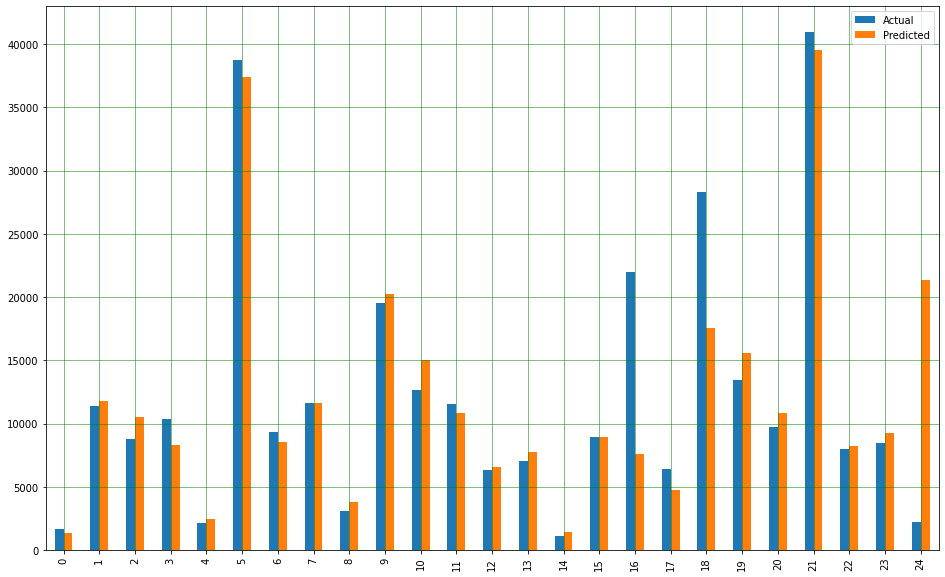

Mean Absolute Error: 3168.240822768881
Root Mean Squared Error: 5916.806329492894


In [11]:
x = data_new[:,[0,2,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Вывод**

Из результатов работы ExtraTreesRegressor можно сделать вывод, что 4 поля( 'age', 'bmi', 'children', 'smoker') описывают данные информативностью немного меньшей, чем все в вместе. Для 3 полей присутствует потеря информации.